In [310]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
dt = 1e-3
k = 8.988e9

In [306]:
class Vector:
    def __init__(self,x,y,z):
        self.z = z
        self.y = y
        self.x = x

    def __str__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"
    
    def __repr__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"


    def __add__(self, other):
        if not isinstance(other,Vector):
            raise ValueError("The 'other' object must be a Vector")
        test = Vector(0,0,0)
        test.x = self.x + other.x
        test.y = self.y + other.y
        test.z = self.z + other.z
        return test

    def __sub__(self, other):
        if not isinstance(other,Vector):
            raise ValueError("The 'other' object must be a Vector")
        result_x = self.x + other.x
        result_y = self.y + other.y
        result_z = self.z + other.z
        return Vector(result_x, result_y, result_z)
    
    def __mul__(self,other):
        return Vector(self.x * other, self.y * other, self.z* other)

    def dot_product(self, other):
        if not isinstance (other, Vector):
            raise ValueError("The 'other' object must be a Vector")
        test = Vector(0,0,0)
        test.x = self.x * other.x
        test.y = self.y * other.y
        test.z = self.z * other.z
        result = test.x + test.y + test.z
        return result
    

    #just check once if the cross product is good or not for lorentz force B_force
    def cross_product(a,b):
        temp = Vector(0, 0, 0)
        temp.x = a.y * b.z - a.z * b.y
        temp.y = a.z * b.x - a.x * b.z
        temp.z = a.x * b.y - a.y * b.x
        return temp
    
    def mod(self):
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)
    
    def dist(self,other):
        return math.sqrt((self.x-other.x)**2 + (self.y-other.y)**2 + (self.z-other.z)**2)

In [307]:
class Particle:
    def __init__ (self,mass,charge,pos,vel):
        self.mass = mass
        self.charge = charge
        self.pos = pos
        self.vel = vel
    
    def __str__ (self):
        return f"Particle \n Mass: {self.mass} \n Charge : {self.charge}\n Position {self.pos}\n Velocity {self.vel}"

    def __repr__ (self):
        return f"Particle \n Mass: {self.mass} \n Charge : {self.charge}\n Position {self.pos}\n Velocity {self.vel}"
    
    def update(self,tot_acc):
        self.vel += tot_acc*dt
        self.pos += self.vel*dt

In [308]:
def Lorentz (particle, E, B):
    E_force = E
    B_force = particle.vel.cross_product(B)
    tot_for = (E_force + B_force)
    tot_acc = tot_for*(particle.charge/particle.mass)
    return tot_acc

In [309]:
def Coulumb_i(par1,par2):
    r = par1.pos.dist(par2.pos)
    force = k * abs(par1.charge * par2.charge) / (r ** 3)
    print(force)
    r_vec =par1.pos - par2.pos
    f_vec = r_vec*force
    return f_vec

In [311]:
mass = 2e-3
charge = 2e-4
pos = Vector(0.0 ,0.0 ,0.0)
vel = Vector(0.0 ,0.0 ,10.0)
par1 = Particle(mass,charge,pos,vel)
par1

Particle 
 Mass: 0.002 
 Charge : 0.0002
 Position Vector(0.0, 0.0, 0.0)
 Velocity Vector(0.0, 0.0, 10.0)

In [312]:
E = Vector(0.0 ,0.0 ,0.0)
B = Vector(0.0 ,1.0 ,0.0)

Calculating the accelaration 

In [313]:
acc1 = Lorentz(par1,E,B)
x_positions = []
y_positions = []
z_positions = []
v = []

In [315]:
# r= mv/qb
ri = (par1.mass*par1.vel.mod())/(par1.charge*B.mod())
ti = 2*np.pi*ri/par1.vel.mod()
print("Time is :",  ti)
ri

Time is : 62.83185307179586


100.0

In [316]:
acc1

Vector(-1.0, 0.0, 0.0)

In [317]:
acc1

Vector(-1.0, 0.0, 0.0)

In [318]:
total_time = 100
n = int(total_time/dt)
for i in range(n):
    par1.update(acc1)
    acc1 = Lorentz(par1,E,B)
    x_positions.append(par1.pos.x)
    y_positions.append(par1.pos.y)
    z_positions.append(par1.pos.z)
    v.append(par1.vel.mod())

 


In [319]:
v


[10.00000005,
 10.000000100000001,
 10.00000015,
 10.000000200000002,
 10.000000250000003,
 10.000000300000005,
 10.000000350000006,
 10.000000400000006,
 10.000000450000009,
 10.000000500000011,
 10.000000550000012,
 10.000000600000014,
 10.000000650000018,
 10.000000700000022,
 10.000000750000025,
 10.000000800000029,
 10.000000850000033,
 10.000000900000037,
 10.000000950000041,
 10.000001000000045,
 10.000001050000051,
 10.000001100000057,
 10.000001150000061,
 10.000001200000067,
 10.000001250000071,
 10.00000130000008,
 10.000001350000085,
 10.000001400000091,
 10.000001450000099,
 10.000001500000105,
 10.000001550000112,
 10.00000160000012,
 10.000001650000128,
 10.000001700000135,
 10.000001750000143,
 10.000001800000152,
 10.000001850000162,
 10.00000190000017,
 10.000001950000179,
 10.000002000000189,
 10.000002050000198,
 10.000002100000208,
 10.000002150000217,
 10.000002200000228,
 10.00000225000024,
 10.000002300000252,
 10.000002350000264,
 10.000002400000275,
 10.000002

In [320]:
rf = (par1.mass*par1.vel.mod())/(par1.charge*B.mod())
tf = 2*np.pi*rf/par1.vel.mod()
print("Time is :",  tf)
rf


Time is : 62.83185307179587


100.0500125018331

In [321]:
acc1

Vector(0.8394911878834214, 0.0, 0.5442931614743822)

In [322]:
par1

Particle 
 Mass: 0.002 
 Charge : 0.0002
 Position Vector(-183.94367585672643, 0.0, -54.447711059315516)
 Velocity Vector(5.442931614743822, 0.0, -8.394911878834213)

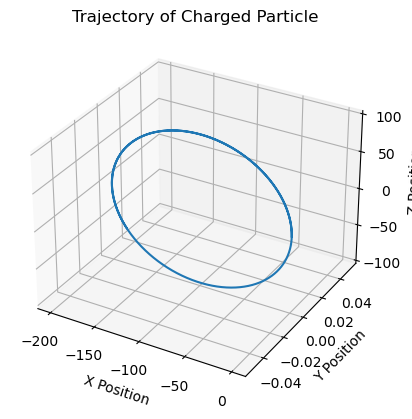

In [323]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x_positions, y_positions, z_positions, label='Trajectory')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('Trajectory of Charged Particle')

plt.show()




